In [1]:
import pandas as pd
import numpy as np

In [2]:
incell_recalc_shape_reac = pd.read_csv('../../../incell_recalc_SHAPE_reac.txt',sep="\t",header=0,index_col=0)
exvivo_recalc_shape_reac = pd.read_csv('../../../exvivo_recalc_SHAPE_reac.txt',sep="\t",header=0,index_col=0)

In [3]:
header_list=['Nucleotide number','SHAPE reactivity','Estimated SE','Nucleotide identity']

incell_rep1_shape_reac_provided_by_weeks = pd.read_csv('../../../Data/Map files Xist/XIST_incell_1M7_rep1.map',sep="\t", names=header_list,index_col=0)
incell_rep2_shape_reac_provided_by_weeks = pd.read_csv('../../../Data/Map files Xist/XIST_incell_1M7_rep2.map',sep="\t", names=header_list,index_col=0)

exvivo_rep1_shape_reac_provided_by_weeks = pd.read_csv('../../../Data/Map files Xist/XIST_exvivo_1M7_rep1.map',sep="\t", names=header_list,index_col=0)
exvivo_rep2_shape_reac_provided_by_weeks = pd.read_csv('../../../Data/Map files Xist/XIST_exvivo_1M7_rep2.map',sep="\t", names=header_list,index_col=0)

incell_rep1_shape_reac_provided_by_weeks = incell_rep1_shape_reac_provided_by_weeks.drop(incell_rep1_shape_reac_provided_by_weeks[["Estimated SE","Nucleotide identity"]],axis=1)
incell_rep2_shape_reac_provided_by_weeks = incell_rep2_shape_reac_provided_by_weeks.drop(incell_rep2_shape_reac_provided_by_weeks[["Estimated SE","Nucleotide identity"]],axis=1)

exvivo_rep1_shape_reac_provided_by_weeks = exvivo_rep1_shape_reac_provided_by_weeks.drop(exvivo_rep1_shape_reac_provided_by_weeks[["Estimated SE","Nucleotide identity"]],axis=1)
exvivo_rep2_shape_reac_provided_by_weeks = exvivo_rep2_shape_reac_provided_by_weeks.drop(exvivo_rep2_shape_reac_provided_by_weeks[["Estimated SE","Nucleotide identity"]],axis=1)


#incell_rep1_shape_reac_provided_by_weeks= incell_rep1_shape_reac_provided_by_weeks.reset_index()
#incell_rep2_shape_reac_provided_by_weeks= incell_rep2_shape_reac_provided_by_weeks.reset_index()

#exvivo_rep1_shape_reac_provided_by_weeks= exvivo_rep1_shape_reac_provided_by_weeks.reset_index()
#exvivo_rep2_shape_reac_provided_by_weeks= exvivo_rep2_shape_reac_provided_by_weeks.reset_index()

In [4]:
print(incell_recalc_shape_reac.head())

   in_cell_recalc_SHAPE_reac_rep1  in_cell_recalc_SHAPE_reac_rep2
1                             0.0                             0.0
2                             0.0                             0.0
3                             0.0                             0.0
4                             0.0                             0.0
5                             0.0                             0.0


In [5]:
print(exvivo_recalc_shape_reac.head())

   ex_vivo_recalc_SHAPE_reac_rep1  ex_vivo_recalc_SHAPE_reac_rep2
1                             0.0                             0.0
2                             0.0                             0.0
3                             0.0                             0.0
4                             0.0                             0.0
5                             0.0                             0.0


In [6]:
#incell_rep1_shape_reac_provided_by_weeks= incell_rep1_shape_reac_provided_by_weeks.reset_index()
print(incell_rep1_shape_reac_provided_by_weeks.tail())

                   SHAPE reactivity
Nucleotide number                  
17914                        -999.0
17915                        -999.0
17916                        -999.0
17917                        -999.0
17918                        -999.0


In [7]:
df = pd.DataFrame(index=np.arange(17918), columns=['nucleotide',
    'recalc_SHAPEreac_rep1_incell', 'recalc_SHAPEreac_rep2_incell', 'recalc_SHAPEreac_rep1_exvivo', 'recalc_SHAPEreac_rep2_exvivo',
    'WEEKS_SHAPEreac_rep1_incell', 'WEEKS_SHAPEreac_rep2_incell', 'WEEKS_SHAPEreac_rep1_exvivo', 'WEEKS_SHAPEreac_rep2_exvivo'])


df = df.fillna(0) # with 0s rather than NaNs
interm_df_for_nucle_column= incell_rep1_shape_reac_provided_by_weeks.copy()
interm_df_for_nucle_column= interm_df_for_nucle_column.reset_index()

df["nucleotide"] = interm_df_for_nucle_column["Nucleotide number"]
df = df.set_index('nucleotide')

In [8]:

df["recalc_SHAPEreac_rep1_incell"] = incell_recalc_shape_reac["in_cell_recalc_SHAPE_reac_rep1"]
df["recalc_SHAPEreac_rep2_incell"] = incell_recalc_shape_reac["in_cell_recalc_SHAPE_reac_rep2"]


df["recalc_SHAPEreac_rep1_exvivo"] = exvivo_recalc_shape_reac["ex_vivo_recalc_SHAPE_reac_rep1"]
df["recalc_SHAPEreac_rep2_exvivo"] = exvivo_recalc_shape_reac["ex_vivo_recalc_SHAPE_reac_rep2"]


df["WEEKS_SHAPEreac_rep1_incell"] = incell_rep1_shape_reac_provided_by_weeks["SHAPE reactivity"]
df["WEEKS_SHAPEreac_rep2_incell"] = incell_rep2_shape_reac_provided_by_weeks["SHAPE reactivity"]

df["WEEKS_SHAPEreac_rep1_exvivo"] = exvivo_rep1_shape_reac_provided_by_weeks["SHAPE reactivity"]
df["WEEKS_SHAPEreac_rep2_exvivo"] = exvivo_rep2_shape_reac_provided_by_weeks["SHAPE reactivity"]



#df["recalc_SHAPEreac_rep1_exvivo"].loc[exvivo_recalc_shape_reac.index] = exvivo_recalc_shape_reac["ex_vivo_recalc_SHAPE_reac_rep1"]
#df["recalc_SHAPEreac_rep2_exvivo"].loc[exvivo_recalc_shape_reac.index] = exvivo_recalc_shape_reac["ex_vivo_recalc_SHAPE_reac_rep2"]





In [9]:
df

,recalc_SHAPEreac_rep1_incell,recalc_SHAPEreac_rep2_incell,recalc_SHAPEreac_rep1_exvivo,recalc_SHAPEreac_rep2_exvivo,WEEKS_SHAPEreac_rep1_incell,WEEKS_SHAPEreac_rep2_incell,WEEKS_SHAPEreac_rep1_exvivo,WEEKS_SHAPEreac_rep2_exvivo
nucleotide,,,,,,,,
1,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
2,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
3,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
4,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
5,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
6,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
7,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
8,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0
9,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0


In [10]:
#Replace -999.0 for SHAPE reac by 0
df=df.replace(-999, 0)

In [12]:
#Analysis
df['Diff_incell_rep1']=df['recalc_SHAPEreac_rep1_incell'] - df['WEEKS_SHAPEreac_rep1_incell']
df['Diff_incell_rep2']=df['recalc_SHAPEreac_rep2_incell'] - df['WEEKS_SHAPEreac_rep2_incell']

df['Diff_exvivo_rep1']=df['recalc_SHAPEreac_rep1_exvivo'] - df['WEEKS_SHAPEreac_rep1_exvivo']
df['Diff_exvivo_rep2']=df['recalc_SHAPEreac_rep2_exvivo'] - df['WEEKS_SHAPEreac_rep2_exvivo']

In [13]:
df=df.reset_index()

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df['nucleotide'], df['Diff_incell_rep1'])

print(max(df['Diff_incell_rep1']))

50.0046296340459


108.40368195702699


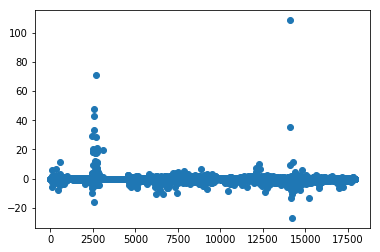

In [15]:
plt.scatter(df['nucleotide'], df['Diff_incell_rep2'])

print(max(df['Diff_incell_rep2']))

108.31898889100599


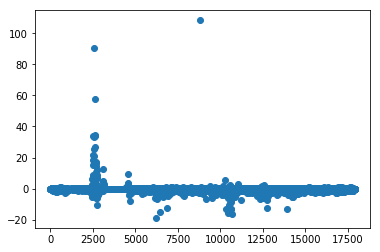

In [16]:
plt.scatter(df['nucleotide'], df['Diff_exvivo_rep1'])

print(max(df['Diff_exvivo_rep1']))

59.7265257965869


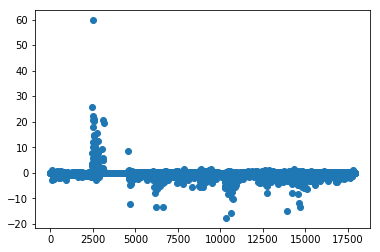

In [17]:
plt.scatter(df['nucleotide'], df['Diff_exvivo_rep2'])

print(max(df['Diff_exvivo_rep2']))